In [1]:
import matplotlib.pyplot as plt

In [25]:

import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'
plt.style.use('seaborn-colorblind')
import re

def latexify(fig_width=None, fig_height=None, columns=1, font_size=8, tick_size=8):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    #assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.7 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0 # Aesthetic ratio
        fig_height = fig_width*golden_mean + 1.2 # height in inches

    #if fig_height > MAX_HEIGHT_INCHES:
    print(f"WARNING: fig_height too large: {fig_height}.")
    #print(matplotlib.rcParams.keys())
    pgf_with_latex = {                    # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                  # blank entries should cause plots
        "font.monospace": [],
        "axes.labelsize": font_size,               # LaTeX default is 10pt font.
        "font.size": font_size,
        "legend.fontsize": font_size,              # Make the legend/label fonts
        "xtick.labelsize": tick_size,              # a little smaller
        "ytick.labelsize": tick_size,
        "figure.figsize": [fig_width, fig_height],   # default fig size of 0.9 textwidth
        #"pgf.preamble": [
        #   r"\\usepackage[utf8x]{inputenc}",   # use utf8 fonts
        #   r"\\usepackage[T1]{fontenc}",       # plots will be generated
        #   r"\\usepackage[detect-all,locale=DE]{siunitx}",
        #   ]                                  # using this preamble
        }

    matplotlib.rcParams.update(pgf_with_latex)


def format_axes(ax, hide = ['top', 'right'], show= ['left', 'bottom']):

    for spine in hide:
        ax.spines[spine].set_visible(False)

    for spine in show:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


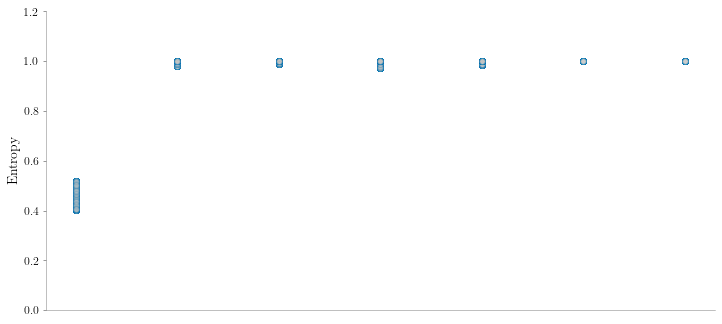

In [37]:
import random

nodes = 60
endpoints = {
    "bin2base64": [
        [ 0.4+(random.random()/8) for _ in range(100) ] # one for each node
    ]*nodes,
    "decrypt": [
        [ min(0.98+(random.random()/5), 1) for _ in range(100) ]
    ]*nodes,
    "encrypt": [
        
        [ min(1, 0.99+(random.random()/3)) for _ in range(100) ]
    ]*nodes,
    "invert": [
        
        [ min(0.97+(random.random()/3), 1) for _ in range(100) ]
    ]*nodes,
    "random": [
        
        [ min(0.98+(random.random()/5), 1) for _ in range(100) ]
    ]*nodes,
    "qr_str": [
        
        [ min(0.999+(random.random()/80), 1) for _ in range(100) ]
    ]*nodes,
    "qr_image": [
        
        [ min(0.999, 1+(random.random()/80)) for _ in range(100) ]
    ]*nodes
}

fig, ax = plt.subplots(1)



latexify(fig_width=12, fig_height=5.5, font_size=17, tick_size=15)

#format_axes(ax, show=['bottom',  'left'], hide=['top', 'right'])
format_axes(ax, hide=['top', 'right'], show=['left', 'bottom'])

ax.set_xticks([])
#ax.violinplot(vals, showmeans=True)#, widths=[1.2]*len(vals))
ax.set_ylabel("Entropy")

ax.set_ylim(0, 1.2)
for i, (e, vals) in enumerate(endpoints.items()):
    for node in vals:
        ax.scatter(
            [i]*len(node),
            node,
            alpha=0.1, color=[0.8,0.8,0.8,0], edgecolors='C0',
        )

plt.savefig("scatter_entropy.png", dpi=300)

In [ ]:
# Execution times